In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
import redis

cache_ip = '198.13.60.78'
cache_pw = 'da56038fa453c22d2c46e83179126e97d4d272d02ece83eb83a97357e842d065'

r = redis.StrictRedis(host=cache_ip, port=6379, password=cache_pw)

In [3]:
# redis keys
KOSPI_TICKERS = 'KOSPI_TICKERS'
KOSDAQ_TICKERS = 'KOSDAQ_TICKERS'

KOSPI_OHLCV = 'KOSPI_OHLCV'
KOSDAQ_OHLCV = 'KOSDAQ_OHLCV'
KOSPI_INDEX = 'I.001_INDEX'

KOSPI_VOL = 'KOSPI_VOL'
KOSDAQ_VOL = 'KOSDAQ_VOL'

kp_tickers = [ticker.decode() for ticker in r.lrange(KOSPI_TICKERS, 0 ,-1)]
kd_tickers = [ticker.decode() for ticker in r.lrange(KOSDAQ_TICKERS, 0 ,-1)]
tickers = kp_tickers + kd_tickers

In [4]:
# 포지션 관리
key = tickers[0] + '_OHLCV'
df = pd.read_msgpack(r.get(key))

kp = pd.read_msgpack(r.get(KOSPI_INDEX))
kp = kp['cls_prc']
kp_ret = ((kp - kp.shift(1)) / kp.shift(1)).fillna(0)

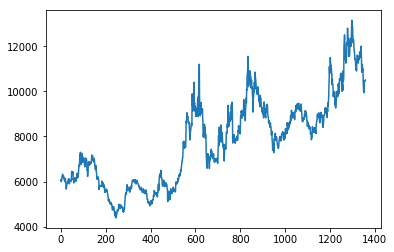

In [5]:
df['cls_prc'].plot()
plt.show()

In [6]:
p = df['cls_prc']

In [7]:
ret = p.pct_change()

In [ ]:
def realize_profit(curr_price, prev_price, , stock_num, capital):
    prev_portfolio = prev_price * stock_num
    curr_portfolio = curr_price * stock_num
    
    profit = curr_portfolio - prev_portfolio
    capital += profit

In [48]:
capital = 1000000
portfolio = 0
stock_num = 0

capital_history = [capital]

for index in range(len(p)):
    
    print(index)
    print('투자 시뮬레이션 시작. 가격: {}'.format(p[index]))
    
    # capital 기록이 2건 이상일 때 반마틴게일 투자방식 시작
    if len(capital_history) < 2:
        buy_amt = capital // p[index]
    else:
        # 수익을 얻었다면, 배팅 금액 고정
        # 손실이 났다면 배팅 금액 50%로 줄이기
        buy_amt = capital // p[index] if capital_history[-1] >= capital_history[-2] else (capital * 0.5) // p[index]
        
    print('매수량: {}'.format(int(buy_amt)))
    
    stock_num = stock_num + buy_amt # buy_amt만큼 주식을 구매
    portfolio = buy_amt * p[index] # 포트폴리오의 가치는 buy_amt * price
    capital = capital - portfolio # 투자 가능한 금액은 포트폴리오의 가치를 초기 자본금에서 뺀 것
    
    if stock_num != 0:
        print('포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.')

        profit = stock_num * p[index]
        capital = capital + profit

        capital_history.append(capital)

        # 포트폴리오 초기화
        portfolio = 0
        stock_num = 0
    
    print('포트폴리오가 비어있습니다. 투자합니다.')

0
투자 시뮬레이션 시작. 가격: 6090
포트폴리오가 비어있습니다. 투자합니다.
매수량: 164
1
투자 시뮬레이션 시작. 가격: 6000
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
2
투자 시뮬레이션 시작. 가격: 6020
포트폴리오가 비어있습니다. 투자합니다.
매수량: 81
3
투자 시뮬레이션 시작. 가격: 6020
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
4
투자 시뮬레이션 시작. 가격: 6110
포트폴리오가 비어있습니다. 투자합니다.
매수량: 161
5
투자 시뮬레이션 시작. 가격: 6200
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
6
투자 시뮬레이션 시작. 가격: 6200
포트폴리오가 비어있습니다. 투자합니다.
매수량: 161
7
투자 시뮬레이션 시작. 가격: 6330
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
8
투자 시뮬레이션 시작. 가격: 6280
포트폴리오가 비어있습니다. 투자합니다.
매수량: 162
9
투자 시뮬레이션 시작. 가격: 6250
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
10
투자 시뮬레이션 시작. 가격: 6220
포트폴리오가 비어있습니다. 투자합니다.
매수량: 81
11
투자 시뮬레이션 시작. 가격: 6240
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
12
투자 시뮬레이션 시작. 가격: 6250
포트폴리오가 비어있습니다. 투자합니다.
매수량: 162
13
투자 시뮬레이션 시작. 가격: 6120
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
14
투자 시뮬레이션 시작. 가격: 6150
포트폴리오가 비어있습니다. 투자합니다.
매수량: 81
15
투자 시뮬레이션 시작. 가격: 6150
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
16
투자 시뮬레이션 시작. 가격: 6100
포트폴리오가 비어있습니다. 투자합니다.
매수량: 163
17
투자 시뮬레이션 시작. 가격: 6000
포트폴리

393
투자 시뮬레이션 시작. 가격: 5040
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
394
투자 시뮬레이션 시작. 가격: 5000
포트폴리오가 비어있습니다. 투자합니다.
매수량: 105
395
투자 시뮬레이션 시작. 가격: 5000
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
396
투자 시뮬레이션 시작. 가격: 4920
포트폴리오가 비어있습니다. 투자합니다.
매수량: 213
397
투자 시뮬레이션 시작. 가격: 5060
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
398
투자 시뮬레이션 시작. 가격: 5100
포트폴리오가 비어있습니다. 투자합니다.
매수량: 212
399
투자 시뮬레이션 시작. 가격: 5110
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
400
투자 시뮬레이션 시작. 가격: 5110
포트폴리오가 비어있습니다. 투자합니다.
매수량: 212
401
투자 시뮬레이션 시작. 가격: 5150
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
402
투자 시뮬레이션 시작. 가격: 5150
포트폴리오가 비어있습니다. 투자합니다.
매수량: 212
403
투자 시뮬레이션 시작. 가격: 5120
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
404
투자 시뮬레이션 시작. 가격: 5000
포트폴리오가 비어있습니다. 투자합니다.
매수량: 108
405
투자 시뮬레이션 시작. 가격: 5050
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
406
투자 시뮬레이션 시작. 가격: 5040
포트폴리오가 비어있습니다. 투자합니다.
매수량: 216
407
투자 시뮬레이션 시작. 가격: 5170
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
408
투자 시뮬레이션 시작. 가격: 5170
포트폴리오가 비어있습니다. 투자합니다.
매수량: 216
409
투자 시뮬레이션 시작. 가격: 5190
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매

매수량: 189
679
투자 시뮬레이션 시작. 가격: 7130
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
680
투자 시뮬레이션 시작. 가격: 7240
포트폴리오가 비어있습니다. 투자합니다.
매수량: 186
681
투자 시뮬레이션 시작. 가격: 7150
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
682
투자 시뮬레이션 시작. 가격: 6990
포트폴리오가 비어있습니다. 투자합니다.
매수량: 95
683
투자 시뮬레이션 시작. 가격: 6890
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
684
투자 시뮬레이션 시작. 가격: 6890
포트폴리오가 비어있습니다. 투자합니다.
매수량: 96
685
투자 시뮬레이션 시작. 가격: 6850
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
686
투자 시뮬레이션 시작. 가격: 6900
포트폴리오가 비어있습니다. 투자합니다.
매수량: 95
687
투자 시뮬레이션 시작. 가격: 6960
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
688
투자 시뮬레이션 시작. 가격: 6940
포트폴리오가 비어있습니다. 투자합니다.
매수량: 191
689
투자 시뮬레이션 시작. 가격: 7020
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
690
투자 시뮬레이션 시작. 가격: 6900
포트폴리오가 비어있습니다. 투자합니다.
매수량: 194
691
투자 시뮬레이션 시작. 가격: 6900
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
692
투자 시뮬레이션 시작. 가격: 6980
포트폴리오가 비어있습니다. 투자합니다.
매수량: 192
693
투자 시뮬레이션 시작. 가격: 7000
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
694
투자 시뮬레이션 시작. 가격: 6990
포트폴리오가 비어있습니다. 투자합니다.
매수량: 192
695
투자 시뮬레이션 시작. 가격: 7020
포트폴리오에 투자한 주식이 있습니다. 모든 

투자 시뮬레이션 시작. 가격: 7720
포트폴리오가 비어있습니다. 투자합니다.
매수량: 72
965
투자 시뮬레이션 시작. 가격: 7680
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
966
투자 시뮬레이션 시작. 가격: 7610
포트폴리오가 비어있습니다. 투자합니다.
매수량: 72
967
투자 시뮬레이션 시작. 가격: 7560
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
968
투자 시뮬레이션 시작. 가격: 7590
포트폴리오가 비어있습니다. 투자합니다.
매수량: 72
969
투자 시뮬레이션 시작. 가격: 7470
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
970
투자 시뮬레이션 시작. 가격: 7480
포트폴리오가 비어있습니다. 투자합니다.
매수량: 73
971
투자 시뮬레이션 시작. 가격: 7540
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
972
투자 시뮬레이션 시작. 가격: 7740
포트폴리오가 비어있습니다. 투자합니다.
매수량: 142
973
투자 시뮬레이션 시작. 가격: 7820
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
974
투자 시뮬레이션 시작. 가격: 7900
포트폴리오가 비어있습니다. 투자합니다.
매수량: 141
975
투자 시뮬레이션 시작. 가격: 7940
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
976
투자 시뮬레이션 시작. 가격: 8000
포트폴리오가 비어있습니다. 투자합니다.
매수량: 139
977
투자 시뮬레이션 시작. 가격: 7980
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
978
투자 시뮬레이션 시작. 가격: 7920
포트폴리오가 비어있습니다. 투자합니다.
매수량: 70
979
투자 시뮬레이션 시작. 가격: 7900
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
980
투자 시뮬레이션 시작. 가격: 7800
포트폴리오가 비어있습니다. 투자합니다.
매수량: 71
981
투자 시뮬

1250
투자 시뮬레이션 시작. 가격: 10800
포트폴리오가 비어있습니다. 투자합니다.
매수량: 94
1251
투자 시뮬레이션 시작. 가격: 10450
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1252
투자 시뮬레이션 시작. 가격: 10300
포트폴리오가 비어있습니다. 투자합니다.
매수량: 47
1253
투자 시뮬레이션 시작. 가격: 10050
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1254
투자 시뮬레이션 시작. 가격: 10000
포트폴리오가 비어있습니다. 투자합니다.
매수량: 48
1255
투자 시뮬레이션 시작. 가격: 10050
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1256
투자 시뮬레이션 시작. 가격: 10250
포트폴리오가 비어있습니다. 투자합니다.
매수량: 95
1257
투자 시뮬레이션 시작. 가격: 10050
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1258
투자 시뮬레이션 시작. 가격: 10900
포트폴리오가 비어있습니다. 투자합니다.
매수량: 43
1259
투자 시뮬레이션 시작. 가격: 10450
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1260
투자 시뮬레이션 시작. 가격: 10500
포트폴리오가 비어있습니다. 투자합니다.
매수량: 44
1261
투자 시뮬레이션 시작. 가격: 10650
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1262
투자 시뮬레이션 시작. 가격: 12050
포트폴리오가 비어있습니다. 투자합니다.
매수량: 78
1263
투자 시뮬레이션 시작. 가격: 12150
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1264
투자 시뮬레이션 시작. 가격: 12500
포트폴리오가 비어있습니다. 투자합니다.
매수량: 76
1265
투자 시뮬레이션 시작. 가격: 12500
포트폴리오에 투자한 주식이 있습니다. 모든 종목을 판매합니다.
1266
투자 시뮬레이션 시작. 가격: 12100
포트폴리

0.1    0.897135
0.5    0.854455
1      0.724138
dtype: float64


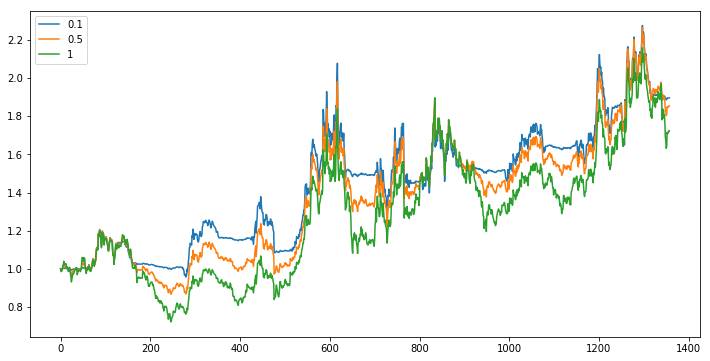

In [10]:
# 고려할 팩터 새팅
kelly_factor = True
anti_martingale_factor = True
trend_factor = True
short_term_trend_window = 20
long_term_trend_window = 60
test_portion_list = [0.1, 0.5, 1]

fee = 0.00015 # 0.015%
tax = 0.003 # 0.3%
total_fee_per_trade = (2 * fee) + tax

backtest_df = pd.DataFrame()

p_1 = p.shift(1).fillna(p[0])
rt = (p - p_1)/p_1

m_short = p.rolling(short_term_trend_window).mean()
m_long = p.rolling(long_term_trend_window).mean()

trend = m_short > m_long

for portion in test_portion_list:
    profit = 1
    profit_history = []

    invest_portion = 1

    resize = False # 투자 금액을 줄일지 말지

    for rat in range(len(rt)):
        ret_pct = rt[rat] - total_fee_per_trade # 수수료, 세금 제외

        profit = profit * ((rt[rat] * invest_portion) + 1)
        profit_history.append(profit)

        # 당일 수익이 +이면, 투자 비중을 조절하지 않는다
        # 수익이 -이면 비중 조절을 한다
        if kelly_factor:
            resize = True
        if anti_martingale_factor:
            resize = False if ret_pct >= 0 else True
        if trend_factor:
            resize = False if trend[rat] == True else True
            
        invest_portion = portion if resize else 1
            
    backtest_df[str(portion)] = profit_history
    
print(backtest_df.iloc[-1] - backtest_df.iloc[0])
backtest_df.plot()

In [21]:
ret_list = []

rt_60 = rt.rolling(60).mean()
kp_ret_60 = kp_ret.rolling(60).mean()

for i in range(len(rt)):
    if i == 0:
        stock_return = rt[i]
        kospi_return = kp_ret[i]
    else:
        stock_return = rt[:i].mean() if i < 60 else rt_60[i]
        kospi_return = kp_ret[:i].mean() if i < 60 else kp_ret_60[i]
    excess_return = stock_return - kospi_return
    ret_list.append(excess_return)
    
kelly = pd.DataFrame(ret_list)
kelly.rename(columns={0: 'Excess Return'}, inplace=True)

kelly_criterion = []
kelly['Excess Return MA'] = kelly['Excess Return'].rolling(60).mean()
kelly['Excess Return MV'] = kelly['Excess Return'].rolling(60).var() 

for i in range(len(kelly)):
    if i == 0:
        exc_ret_mean = kelly['Excess Return'][i].mean()
        exc_ret_var = kelly['Excess Return'][i].var()
    else:
        exc_ret_mean = kelly['Excess Return'][:i].mean() if i < 60 else kelly['Excess Return MA'][i]
        exc_ret_var = kelly['Excess Return'][:i].var() if i < 60 else kelly['Excess Return MV'][i]
    kelly_ratio = exc_ret_mean / exc_ret_var
    kelly_criterion.append(kelly_ratio)

kelly['Kelly Criterion'] = kelly_criterion
print(kelly)

      Excess Return  Excess Return MA  Excess Return MV  Kelly Criterion
0          0.000000               NaN               NaN              NaN
1          0.000000               NaN               NaN              NaN
2         -0.004511               NaN               NaN              NaN
3         -0.000663               NaN               NaN      -221.660112
4         -0.000412               NaN               NaN      -275.294721
5          0.003984               NaN               NaN      -303.620116
6          0.006286               NaN               NaN       -36.682629
7          0.004313               NaN               NaN        54.829749
8          0.007026               NaN               NaN        92.790600
9          0.004791               NaN               NaN       122.996776
10         0.004995               NaN               NaN       151.124155
11         0.004393               NaN               NaN       178.190377
12         0.004429               NaN              

/Users/abc/.virtualenvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


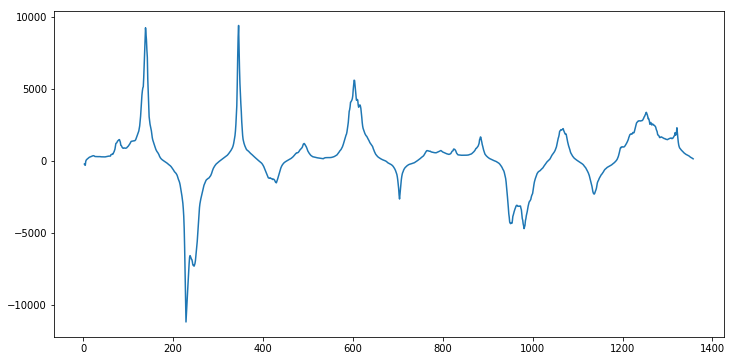

In [22]:
kelly['Kelly Criterion'].plot()

In [19]:
kelly['']

0.0